The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

In [1]:
import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

# Open in Pickle

In [2]:
# import pickle
# import numpy
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.tools.plotting import scatter_matrix

# def Open_Pickle(dataframe):
#     with open (dataframe, 'rb') as f:
#         return pickle.load(f)
    
    
# anp_df = Open_Pickle('data_science_case/anp.pkl')
# face_df = Open_Pickle('data_science_case/face.pkl')
# image_df = Open_Pickle('data_science_case/image_data.pkl')
# metrics_df = Open_Pickle('data_science_case/image_metrics.pkl')
# object_labels_df = Open_Pickle('data_science_case/object_labels.pkl')
# survey_df = Open_Pickle('data_science_case/survey.pkl')

# Exploratory  section:

Moved to the Marketing_exploratory.ipynb

# Some preprocessing before merging

In [3]:
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
image_df.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,640.0,640.0,Lo-fi,14-08-2016 22:37:11,0.800521,3468175004,7.0,0.0,1.0
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0
2,594552614686078174_263042348,640.0,640.0,Vesper,22-11-2013 04:56:56,0.672679,263042348,316.0,347.0,73.0
3,553884883234370621_263042348,640.0,640.0,Amaro,27-09-2013 02:17:25,0.843525,263042348,316.0,347.0,73.0
4,725551583154452417_263042348,640.0,640.0,Amaro,21-05-2014 22:48:30,0.859796,263042348,316.0,347.0,73.0


In [4]:
#possible feature?
#add image ratio and drop height/width?

#TODO: calculate total pixels, find correlation with perma score, if non, drop the width & height, just keep the ratio

In [5]:
#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [6]:
#Drop unnecessary columns in survey_df dataframework---MIGHT NEED MORE  COLUMNS!!!
print 'The survey started at: '+str(survey_df['start_q'].min())
print 'The survey ended at: '+str(survey_df['end_q'].max())+'\n\n'
survey_df['start_q'] = pd.to_datetime(survey_df['start_q'], format = '%Y-%m-%d %H:%M:%S')
survey_df['end_q'] = pd.to_datetime(survey_df['end_q'], format = '%Y-%m-%d %H:%M:%S')
start_survey =survey_df['start_q'].min()
end_survey = survey_df['end_q'].max()
drop = ['participate','completed','start_q','end_q','network_id','private_account']
survey_df =  survey_df.drop(drop,axis=1)
survey_df.head()

The survey started at: 2016-12-05 14:01:21
The survey ended at: 2017-03-23 15:16:17




,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,6.198686e+08,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,1.879203e+08,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,5.133243e+08,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,3.437021e+09,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,3.342091e+07,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0


# Merging of the Image elements

In [7]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')


In [8]:
im_anp_obj_face_frame.shape

(3887625, 32)

In [9]:
im_anp_obj_face_frame.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [10]:
print 'The number of unique users who took the Survey is: '+str(len(survey_df['insta_user_id'].unique()))
print 'The number of unique users in  the image data-set is: '+str(len(im_anp_obj_face_frame['user_id'].unique()))

The number of unique users who took the Survey is: 329
The number of unique users in  the image data-set is: 144


It seems that there is a conflict between the <b>'user-id'</b> in the <b>im_anp_obj_face_frame</b> dataframe and the <b>'insta_user_id'</b> in the <b>survey_df</b> dateframe. This conflict exists because the two columns are from different format (one is a string and the other a float). In  order to be able to merge them we need to convert the string values to  float.

In [11]:
im_anp_obj_face_frame['user_id'] = im_anp_obj_face_frame['user_id'].apply(lambda x : float(x))

In [12]:
#convert all the image_posted_time strings to datime object for tracking the year of creation
im_anp_obj_face_frame['image_posted_time'] = pd.to_datetime(im_anp_obj_face_frame['image_posted_time'], format = '%d-%m-%Y %H:%M:%S' )

In [13]:
print start_survey
print end_survey  

2016-12-05 14:01:21
2017-03-23 15:16:17


In [15]:
from dateutil.relativedelta import relativedelta
import datetime

def change_time_intervals(time,  num_months):
    three_mon_rel = relativedelta(months=num_months)
    return time +three_mon_rel

#test the function
change_time_intervals(end_survey,-3)

Timestamp('2016-12-23 15:16:17')

In [18]:
last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(start_survey,-3)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(end_survey,3) )]
print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
print last_years_images.shape

The last year dataframe has 109 users.
(598269, 32)


In [19]:
# last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(end_survey,-6)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(start_survey,6) )]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
# print test.shape

In [20]:
#keeps only the last two year images of the users
# years = ['2016','2017']
# last_years = im_anp_obj_face_frame['image_posted_time'].apply(lambda x : True if str(x.year) in years else False)
# last_years_images = im_anp_obj_face_frame[last_years.values]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'

In [21]:
#merge the image dataframe with the survey dataframe 
image_survey = pd.merge(last_years_images,survey_df,left_on='user_id',right_on = 'insta_user_id')
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(622593, 71)
The merging dataframe has 109 users.


# Further Pre-Processing

Because there are some missing values (NaN)  in the of the explanatory variables of the merging dataframework we need to further pre process our data by excluding the rows that have NaN values.

In [22]:
image_survey = image_survey.dropna()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(619803, 71)
The merging dataframe has 108 users.


In [23]:
#drop duplicates
image_survey = image_survey.drop_duplicates()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(504006, 71)
The merging dataframe has 108 users.


In [24]:
image_survey.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
472626,1489572083595194497_30837828,640.0,640.0,Normal,2017-04-10 02:20:51,0.837742,3.083783e+07,1617.0,1459.0,552.0,...,3.083783e+07,8,8.0,8.0,8.0,6.0,8,4.0,8,548.0
1949,1373465021300229307_53918317,640.0,640.0,Normal,2016-10-31 21:36:51,0.800527,5.391832e+07,100.0,174.0,105.0,...,5.391832e+07,1,7.0,8.0,5.0,5.0,1,8.0,1,105.0
252195,1483100754775389418_262136545,640.0,640.0,Nashville,2017-04-01 04:03:29,0.876535,2.621365e+08,192.0,367.0,905.0,...,2.621365e+08,5,6.0,6.0,7.0,6.0,5,8.0,5,907.0
392703,1418354518614354022_2123557533,640.0,640.0,Juno,2017-01-01 20:04:16,0.795764,2.123558e+09,95.0,125.0,56.0,...,2.123558e+09,10,10.0,9.0,9.0,10.0,10,1.0,10,55.0
17690,1407699890196218254_1619510,640.0,640.0,Clarendon,2016-12-18 03:15:25,0.826332,1.619510e+06,364.0,814.0,2037.0,...,1.619510e+06,4,7.0,4.0,5.0,4.0,4,2.0,4,1515.0


In [25]:
image_survey.ix[:,:10].sample(5)

/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
29313,1432698618887897563_143854846,800.0,640.0,Gingham,2017-01-21 15:03:26,0.756939,1.438548e+08,260.0,794.0,744.0
256362,1417103698132077334_1804133497,480.0,480.0,Normal,2016-12-31 02:39:06,0.867862,1.804133e+09,126.0,210.0,60.0
528766,1487167528412996690_703978203,640.0,640.0,Normal,2017-04-06 18:43:26,0.715028,7.039782e+08,687.0,376.0,2277.0
316090,1413340483060773676_244047076,765.0,612.0,Normal,2016-12-25 22:02:16,0.857085,2.440471e+08,274.0,289.0,221.0
449964,1359966191745885073_30837828,640.0,640.0,Normal,2016-10-13 06:37:05,0.862305,3.083783e+07,1617.0,1459.0,552.0


# Correlation Coefficients

In [26]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.032317,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.024987,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.028486,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_id,-0.032317,0.024987,-0.028486,1.000000,0.010289,0.067582,-0.166396,-0.014089,-0.012419,-0.003699,...,0.021957,0.033926,-0.049911,0.039764,-0.052432,-0.041536,-0.065157,0.014768,-0.028688,-0.016735
user_followed_by,-0.044179,0.032737,-0.010293,0.010289,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.067582,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,-0.166396,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.014089,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,-0.012419,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,-0.003699,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657


** To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated. **

** To-Do 4: Calculate the Spearman rank for the attributes. **

### ASSIGNMENT

In this notebook we learned how to train and test a regressor on numerical data. For this assignment you are required to do the following:

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.

In [27]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TO-DO:3


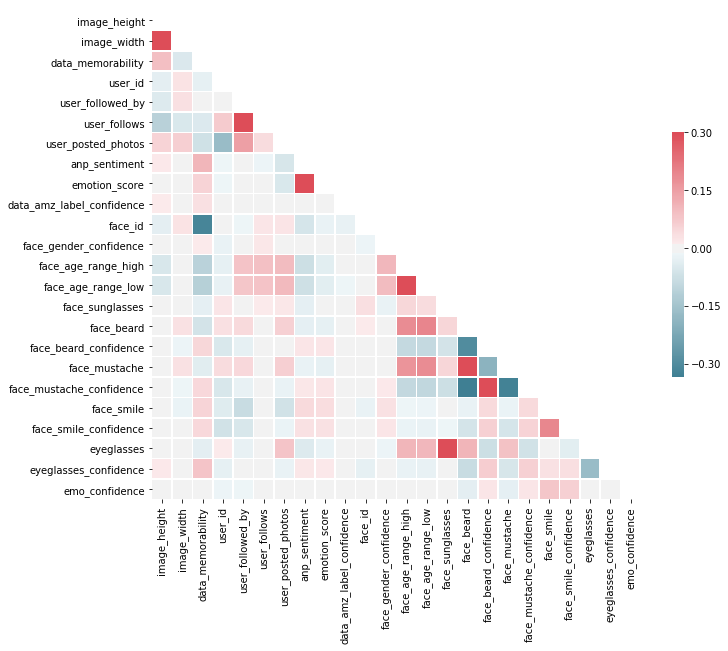

In [28]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix_survey = image_survey.corr()
correlation_matrix_survey

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
image_height,1.000000,0.297464,0.156580,-0.112329,-0.075188,-0.130448,0.071876,0.030245,0.025428,0.030631,...,-0.112329,-0.029610,0.012265,0.021747,-0.026635,-0.093887,-0.029610,0.056413,-0.029610,0.079552
image_width,0.297464,1.000000,-0.046328,-0.091997,0.017805,-0.046992,0.062227,0.019056,0.011548,0.018823,...,-0.091997,0.062195,0.061254,-0.006866,0.013193,-0.031505,0.062195,-0.068654,0.062195,0.074006
data_memorability,0.156580,-0.046328,1.000000,-0.031232,-0.062153,-0.049857,-0.062459,0.121321,0.052576,0.031464,...,-0.031232,0.042763,0.052754,-0.005571,0.011227,0.004363,0.042763,0.033859,0.042763,-0.040999
user_id,-0.112329,-0.091997,-0.031232,1.000000,-0.058255,0.078759,-0.287960,-0.032367,-0.005162,-0.013570,...,1.000000,-0.066887,-0.063360,-0.053186,-0.091172,0.140703,-0.066887,0.080471,-0.066887,-0.378688
user_followed_by,-0.075188,0.017805,-0.062153,-0.058255,1.000000,0.465610,0.303489,-0.037866,-0.031702,0.019310,...,-0.058255,-0.033231,0.068684,-0.132980,-0.149225,-0.076939,-0.033231,-0.102169,-0.033231,0.238169
user_follows,-0.130448,-0.046992,-0.049857,0.078759,0.465610,1.000000,0.003626,-0.032657,-0.022873,0.004013,...,0.078759,-0.198279,0.041767,-0.166567,-0.087451,-0.063794,-0.198279,0.045042,-0.198279,-0.010172
user_posted_photos,0.071876,0.062227,-0.062459,-0.287960,0.303489,0.003626,1.000000,-0.080658,-0.088377,0.006875,...,-0.287960,-0.048993,-0.127141,-0.383954,-0.312848,-0.133060,-0.048993,-0.185642,-0.048993,0.935609
anp_sentiment,0.030245,0.019056,0.121321,-0.032367,-0.037866,-0.032657,-0.080658,1.000000,0.335567,0.010590,...,-0.032367,0.032519,0.034687,0.048231,0.059810,-0.000840,0.032519,0.034434,0.032519,-0.074729
emotion_score,0.025428,0.011548,0.052576,-0.005162,-0.031702,-0.022873,-0.088377,0.335567,1.000000,0.004156,...,-0.005162,0.017618,0.026820,0.053281,0.060196,0.020255,0.017618,0.030908,0.017618,-0.089273
data_amz_label_confidence,0.030631,0.018823,0.031464,-0.013570,0.019310,0.004013,0.006875,0.010590,0.004156,1.000000,...,-0.013570,-0.003776,0.003838,0.009601,0.008943,-0.017284,-0.003776,0.029938,-0.003776,0.011475


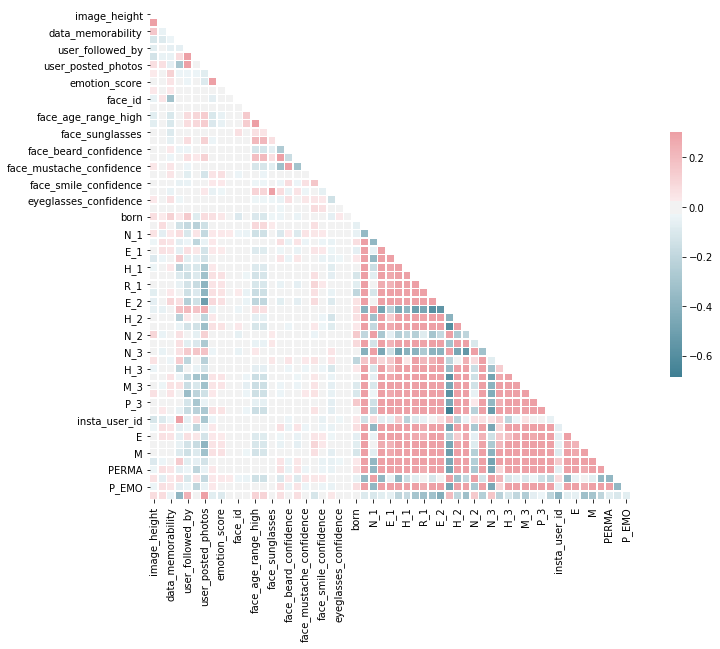

In [30]:
mask = np.zeros_like(correlation_matrix_survey, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_survey, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear Regression

# TO-DO:1

In [31]:
from sklearn.cross_validation import train_test_split

independent_variables = image_survey[list(correlation_matrix)]
dependent_variables = image_survey['PERMA']

x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)


/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
print x_train.shape
print x_test.shape

print y_train.shape
print y_test.shape

(403204, 24)
(100802, 24)
(403204,)
(100802,)


# TO-DO:2 

In [33]:
from sklearn.linear_model import LinearRegression
import time

start = time.time()
#This creates a LinearRegression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(x_train, y_train)

end = time.time()
print(end - start)


0.716135978699


In [34]:
# Make predictions using the testing set
insta_y_pred = lm.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([ -1.15546469e-03,   3.38160443e-03,   1.46529513e+00,
        -1.31238126e-10,   2.52525641e-04,  -4.21400874e-04,
        -1.94118041e-04,   5.12882848e-02,   6.77338926e-02,
        -8.37104179e-04,   8.50388445e-06,  -9.42136275e-04,
        -5.37343517e-03,   6.60308714e-03,   1.21199653e-01,
         2.62243872e-01,  -3.69130274e-03,   4.69861237e-02,
        -6.38330119e-04,  -8.73110378e-02,  -3.39693855e-03,
        -2.11565509e-01,  -2.69963730e-03,  -8.80864787e-05]))
Mean squared error: 2.28
Variance score: 0.08


# Different linear library

In [36]:
import statsmodels.formula.api as smf

#REFERENCE---->http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

columns =list(correlation_matrix)



In [37]:
value ='PERMA~'+ '+'.join(columns)

print value

PERMA~image_height+image_width+data_memorability+user_id+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_id+face_gender_confidence+face_age_range_high+face_age_range_low+face_sunglasses+face_beard+face_beard_confidence+face_mustache+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [38]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula=value, data=image_survey).fit()

# print the coefficients
lm1.params

Intercept                    5.535791e+00
face_sunglasses[T.True]      1.262894e-01
face_beard[T.True]           2.576881e-01
face_mustache[T.True]        5.108984e-02
face_smile[T.True]          -8.668297e-02
eyeglasses[T.True]          -2.099838e-01
image_height                -1.153549e-03
image_width                  3.326940e-03
data_memorability            1.436462e+00
user_id                     -1.306507e-10
user_followed_by             2.507563e-04
user_follows                -4.225030e-04
user_posted_photos          -1.929421e-04
anp_sentiment                5.126229e-02
emotion_score                6.149704e-02
data_amz_label_confidence   -8.386259e-04
face_id                     -4.532113e-05
face_gender_confidence      -8.602206e-04
face_age_range_high         -5.842158e-03
face_age_range_low           7.078320e-03
face_beard_confidence       -3.841952e-03
face_mustache_confidence    -4.297638e-04
face_smile_confidence       -3.480641e-03
eyeglasses_confidence       -2.615

In [39]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1734.
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:40:45   Log-Likelihood:            -9.2268e+05
No. Observations:              504006   AIC:                         1.845e+06
Df Residuals:                  503981   BIC:                         1.846e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.5358      0.076     73.139      0.000       5.387       5.684
face_sunglasses[T.True]       0.1263      0.008     16.121      0.000       0.111       0.142
face_beard[T.True]            0.2577      0.007     34.792      0.000       0.243       0.272
face_mustache[T.True]         0.0511      0.008      6.549      0.000       0.036       0.066
face_smile[T.True]           -0.0867      0.005    -17.694      0.000      -0.096      -0.077
eyeglasses[T.True]           -0.2100      0.005    -38.481      0.000      -0.221      -0.199
image_height                 -0.0012   2.06e-05    -55.941      0.000      -0.001      -0.001
image_width                   0.0033   6.54e-05     50.853      0.000       0.003       0.003
data_memorability             1.4365      0.043     33.225      0.000       1.352       1.521
user_id                   -1.307e-10    2.5e-12    -52.357      0.000   -1.36e-10   -1.26e-10
user_followed_by              0.0003   4.45e-06     56.310      0.000       0.000       0.000
user_follows                 -0.0004   2.75e-06   -153.506      0.000      -0.000      -0.000
user_posted_photos           -0.0002    2.9e-06    -66.546      0.000      -0.000      -0.000
anp_sentiment                 0.0513      0.005      9.403      0.000       0.041       0.062
emotion_score                 0.0615      0.032      1.933      0.053      -0.001       0.124
data_amz_label_confidence    -0.0008      0.000     -3.663      0.000      -0.001      -0.000
face_id                   -4.532e-05   6.75e-05     -0.671      0.502      -0.000    8.71e-05
face_gender_confidence       -0.0009      0.000     -2.325      0.020      -0.002      -0.000
face_age_range_high          -0.0058      0.001     -7.256      0.000      -0.007      -0.004
face_age_range_low            0.0071      0.001      6.263      0.000       0.005       0.009
face_beard_confidence        -0.0038      0.000    -18.994      0.000      -0.004      -0.003
face_mustache_confidence     -0.0004      0.000     -1.957      0.050      -0.001    5.42e-07
face_smile_confidence        -0.0035      0.000    -22.469      0.000      -0.004      -0.003
eyeglasses_confidence        -0.0026      0.000    -11.976      0.000      -0.003      -0.002
emo_confidence            -5.898e-05   6.05e-05     -0.975      0.330      -0.000    5.96e-05
==============================================================================
Omnibus:                     2582.266   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3719.469
Skew:                           0.021   Prob(JB):                         0.00
Kurtosis:                       3.419   Cond. No.                     4.18e+10
========================================================

In [40]:
# calculate r-square 
lm1.rsquared

0.076287429590801814

In [41]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,5.387444e+00,5.684138e+00
face_sunglasses[T.True],1.109356e-01,1.416432e-01
face_beard[T.True],2.431715e-01,2.722047e-01
face_mustache[T.True],3.579872e-02,6.638097e-02
face_smile[T.True],-9.628494e-02,-7.708100e-02
eyeglasses[T.True],-2.206790e-01,-1.992886e-01
image_height,-1.193965e-03,-1.113133e-03
image_width,3.198713e-03,3.455167e-03
data_memorability,1.351725e+00,1.521199e+00
user_id,-1.355416e-10,-1.257599e-10


In [42]:
y_predict = lm1.predict(x_test)
y_predict.head()

100417    6.610805
366519    6.181906
167454    6.464979
194329    6.812454
445584    6.990362
dtype: float64

In [43]:
#sklearn predictions
insta_y_pred[:5]

array([ 6.61551897,  6.17874336,  6.46478329,  6.81779634,  6.98811832])

# Plot the residuals

In [44]:
residuals = y_test - insta_y_pred
residuals.head()

100417   -0.615519
366519    0.821257
167454    1.535217
194329    1.182204
445584    2.011882
Name: PERMA, dtype: float64

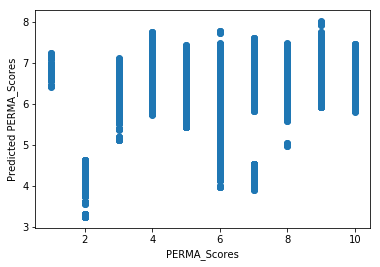

In [45]:
#PERMA Scores are from  1-10

plt.scatter(y_test, insta_y_pred)
plt.xlabel("PERMA_Scores")
plt.ylabel("Predicted PERMA_Scores")
plt.title("")
plt.show()

It is clear that the regression model doesnt give accurate predictions for all the variables at once.

# Start-Analysis

In [46]:
def subtrack_features(main_list, subtr_features):
    '''Throw away some features (columns)'''
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    '''Prepare input command (string) for statmodel'''
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    '''Run a linear regression print the coefficients and return the linear model.'''
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [47]:
#print len(columns)
unnecessary = ['face_age_range_high','face_age_range_low','face_mustache','face_beard','user_id','face_id']


features = subtrack_features(columns,unnecessary)
print "The number of features are: "+str(len(features))+'\n'

print prepare_set_statmodel(features)


The number of features are: 18

PERMA~image_height+image_width+data_memorability+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_gender_confidence+face_sunglasses+face_beard_confidence+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [48]:
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [49]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
lm_model = regression_stats(prepare_set_statmodel(features),image_survey)
lm_model.summary() 

Intercept                    5.478734
face_sunglasses[T.True]      0.125847
face_smile[T.True]          -0.078066
eyeglasses[T.True]          -0.203965
image_height                -0.001096
image_width                  0.003535
data_memorability            1.461094
user_followed_by             0.000261
user_follows                -0.000434
user_posted_photos          -0.000140
anp_sentiment                0.063707
emotion_score                0.065631
data_amz_label_confidence   -0.000729
face_gender_confidence      -0.000516
face_beard_confidence       -0.004852
face_mustache_confidence    -0.003127
face_smile_confidence       -0.003177
eyeglasses_confidence       -0.002498
emo_confidence              -0.000108
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1992.
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:40:47   Log-Likelihood:            -9.2536e+05
No. Observations:              504006   AIC:                         1.851e+06
Df Residuals:                  503987   BIC:                         1.851e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     5.4787      0.073     74.618      0.000       5.335       5.623
face_sunglasses[T.True]       0.1258      0.008     16.019      0.000       0.110       0.141
face_smile[T.True]           -0.0781      0.005    -15.879      0.000      -0.088      -0.068
eyeglasses[T.True]           -0.2040      0.005    -37.349      0.000      -0.215      -0.193
image_height                 -0.0011   2.07e-05    -53.060      0.000      -0.001      -0.001
image_width                   0.0035   6.56e-05     53.896      0.000       0.003       0.004
data_memorability             1.4611      0.041     35.298      0.000       1.380       1.542
user_followed_by              0.0003   4.47e-06     58.344      0.000       0.000       0.000
user_follows                 -0.0004   2.75e-06   -157.774      0.000      -0.000      -0.000
user_posted_photos           -0.0001   2.77e-06    -50.422      0.000      -0.000      -0.000
anp_sentiment                 0.0637      0.005     11.673      0.000       0.053       0.074
emotion_score                 0.0656      0.032      2.052      0.040       0.003       0.128
data_amz_label_confidence    -0.0007      0.000     -3.167      0.002      -0.001      -0.000
face_gender_confidence       -0.0005      0.000     -1.403      0.161      -0.001       0.000
face_beard_confidence        -0.0049      0.000    -24.218      0.000      -0.005      -0.004
face_mustache_confidence     -0.0031      0.000    -14.752      0.000      -0.004      -0.003
face_smile_confidence        -0.0032      0.000    -20.420      0.000      -0.003      -0.003
eyeglasses_confidence        -0.0025      0.000    -11.384      0.000      -0.003      -0.002
emo_confidence               -0.0001   6.08e-05     -1.783      0.075      -0.000    1.08e-05
==============================================================================
Omnibus:                     1751.333   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2366.154
Skew:                           0.011   Prob(JB):                         0.00
Kurtosis:                       3.335   Cond. No.                     6.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Average the data

In [50]:
#One solution for training is to average the data as the lecturer proposed
image_survey_avg = image_survey.groupby(['user_id']).mean()
print image_survey_avg.shape
#Megeimage_survey_avg.sample(5)

(108, 57)


In [51]:
#Merge Big dataframe to metrics

image_survey_metrics = pd.merge(image_survey, metrics_df, how='inner', on='image_id')
image_survey_metrics = image_survey_metrics.dropna()
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))

The number of unique users in dataframe is: 107


In [52]:
image_survey_metrics.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
512908,1385011922008971003_545497348,410.0,640.0,Normal,2016-11-16 19:58:28,0.832655,545497348.0,1345.0,498.0,505.0,...,9.0,4.0,8.0,8.0,6,7.0,6,505.0,3.0,23.0
252758,1427978456390277503_7410944,677.0,640.0,Juno,2017-01-15 02:45:19,0.805844,7410944.0,146.0,118.0,406.0,...,6.0,9.0,9.0,6.0,5,7.0,5,396.0,0.0,14.0
395172,1510981387431649416_30837828,360.0,640.0,Valencia,2017-05-09 15:17:19,0.737031,30837828.0,1617.0,1459.0,552.0,...,8.0,8.0,8.0,6.0,8,4.0,8,548.0,0.0,75.0
405485,1468626510020802234_46329534,640.0,640.0,Normal,2017-03-12 04:45:44,0.812957,46329534.0,322.0,559.0,503.0,...,4.0,3.0,3.0,2.0,4,10.0,4,501.0,0.0,41.0
144598,1450160258681227463_33420910,799.0,640.0,Normal,2017-02-14 17:16:35,0.866521,33420910.0,271.0,247.0,769.0,...,7.0,8.0,8.0,7.0,8,3.0,8,767.0,0.0,30.0


In [53]:
image_survey_avg = image_survey_metrics.groupby(['user_id']).mean()
print image_survey_avg.shape

(107, 59)


In [54]:
#Add the features of the metrics to the main features list
features = list(correlation_matrix)
features.append(u'like_count')
features.append(u'comment_count')
features.remove(u'user_id')
#features+['like_count','comment_count
print features

[u'image_height', u'image_width', u'data_memorability', u'user_followed_by', u'user_follows', u'user_posted_photos', u'anp_sentiment', u'emotion_score', u'data_amz_label_confidence', u'face_id', u'face_gender_confidence', u'face_age_range_high', u'face_age_range_low', u'face_sunglasses', u'face_beard', u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence', u'face_smile', u'face_smile_confidence', u'eyeglasses', u'eyeglasses_confidence', u'emo_confidence', u'like_count', u'comment_count']


In [55]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
#We are going to fit the average of the data of the users

lm2_model = regression_stats(prepare_set_statmodel(features),image_survey_avg)
lm2_model.summary() 

Intercept                   -7.314973
image_height                -0.001026
image_width                  0.020890
data_memorability            2.111371
user_followed_by             0.000243
user_follows                -0.000274
user_posted_photos          -0.000478
anp_sentiment                4.929689
emotion_score               -4.016572
data_amz_label_confidence    0.070201
face_id                      0.012158
face_gender_confidence      -0.016965
face_age_range_high         -0.225483
face_age_range_low           0.332629
face_sunglasses              0.051405
face_beard                   3.539573
face_beard_confidence       -0.006369
face_mustache               -0.998796
face_mustache_confidence     0.004547
face_smile                   0.587932
face_smile_confidence       -0.040641
eyeglasses                  -0.985613
eyeglasses_confidence       -0.030222
emo_confidence               0.028387
like_count                  -0.000233
comment_count                0.100938
dtype: float

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1.615
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0560
Time:                        23:40:52   Log-Likelihood:                -193.51
No. Observations:                 107   AIC:                             439.0
Df Residuals:                      81   BIC:                             508.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.3150     18.021     -0.406      0.686     -43.171      28.542
image_height                 -0.0010      0.003     -0.298      0.767      -0.008       0.006
image_width                   0.0209      0.010      2.147      0.035       0.002       0.040
data_memorability             2.1114      7.214      0.293      0.771     -12.243      16.465
user_followed_by              0.0002      0.000      0.668      0.506      -0.000       0.001
user_follows                 -0.0003      0.000     -1.324      0.189      -0.001       0.000
user_posted_photos           -0.0005      0.000     -1.322      0.190      -0.001       0.000
anp_sentiment                 4.9297      1.896      2.600      0.011       1.158       8.702
emotion_score                -4.0166     10.207     -0.394      0.695     -24.325      16.292
data_amz_label_confidence     0.0702      0.071      0.995      0.323      -0.070       0.211
face_id                       0.0122      0.014      0.899      0.371      -0.015       0.039
face_gender_confidence       -0.0170      0.139     -0.122      0.903      -0.294       0.260
face_age_range_high          -0.2255      0.143     -1.580      0.118      -0.509       0.058
face_age_range_low            0.3326      0.205      1.622      0.109      -0.075       0.741
face_sunglasses               0.0514      1.405      0.037      0.971      -2.744       2.847
face_beard                    3.5396      2.223      1.592      0.115      -0.883       7.962
face_beard_confidence        -0.0064      0.061     -0.105      0.917      -0.127       0.114
face_mustache                -0.9988      2.111     -0.473      0.637      -5.199       3.201
face_mustache_confidence      0.0045      0.060      0.075      0.940      -0.115       0.124
face_smile                    0.5879      1.227      0.479      0.633      -1.853       3.028
face_smile_confidence        -0.0406      0.047     -0.859      0.393      -0.135       0.053
eyeglasses                   -0.9856      0.930     -1.059      0.293      -2.837       0.866
eyeglasses_confidence        -0.0302      0.049     -0.617      0.539      -0.128       0.067
emo_confidence                0.0284      0.059      0.477      0.634      -0.090       0.147
like_count                   -0.0002      0.005     -0.051      0.960      -0.009       0.009
comment_count                 0.1009      0.172      0.585      0.560      -0.242       0.444
==============================================================================
Omnibus:                        6.341   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                8.840
Skew:                          -0.227   Prob(JB):                       0.0120
Kurtosis:                       4.333   C

In [56]:
image_survey_avg.ix[:,:10].sample(5)

/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id
user_id,,,,,,,,,,
312682501.0,640.000000,640.000000,0.824849,252.0,654.0,273.0,0.122660,0.185355,88.630522,82.308989
22180590.0,712.285714,632.906404,0.850725,890.0,115.0,1365.0,0.190616,0.184030,92.739932,49.482759
6734387.0,599.372624,640.000000,0.807435,1047.0,888.0,465.0,0.235389,0.217630,91.349976,77.049430
33420910.0,699.467699,639.057873,0.830613,271.0,247.0,769.0,0.210129,0.169216,94.032771,58.479812
316760531.0,640.000000,640.000000,0.802456,51.0,84.0,68.0,0.021214,0.149681,91.391963,72.159091


In [57]:
image_survey_avg.ix[:,10:20].sample(5)

,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence
user_id,,,,,,,,,,
1.152083e+07,99.878965,41.046729,25.261682,0.102804,0.373832,86.940460,0.224299,88.161945,0.514019,89.212190
1.249458e+09,100.000000,17.000000,9.857143,0.000000,0.000000,98.722202,0.000000,98.443013,1.000000,88.131133
4.948371e+08,98.097025,49.724806,32.482558,0.058140,0.137597,94.515476,0.067829,96.310977,0.552326,83.512733
2.440471e+08,99.439844,49.044853,31.570386,0.044853,0.225885,91.470372,0.217509,91.108544,0.546069,86.079043
2.218059e+07,99.943643,39.093596,23.389163,0.098522,0.113300,94.819045,0.088670,97.543999,0.871921,90.160219


In [58]:
image_survey_avg.ix[:,20:35].sample(5)

,eyeglasses,eyeglasses_confidence,emo_confidence,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,M_2,E_2,LON
user_id,,,,,,,,,,,,,,,
588452400.0,0.742806,92.911598,30.009655,1990.0,7.0,9.0,9.0,8.0,8.0,7.0,8.0,9.0,10.0,9.0,7.0
262136545.0,0.271903,94.807793,29.507124,1984.0,7.0,8.0,5.0,6.0,6.0,7.0,7.0,6.0,9.0,8.0,4.0
33746400.0,0.000000,96.483423,30.391668,1970.0,8.0,5.0,7.0,8.0,6.0,6.0,6.0,7.0,6.0,7.0,4.0
242494547.0,0.043651,99.062790,32.693019,1997.0,9.0,10.0,5.0,7.0,7.0,9.0,8.0,6.0,5.0,5.0,9.0
372088523.0,0.382868,95.143086,27.004233,1981.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,7.0,5.0


In [59]:
image_survey_avg.ix[:,35:50].sample(5)

,H_2,P_2,N_2,A_3,N_3,E_3,H_3,R_2,M_3,R_3,P_3,HAP,insta_user_id,P,E
user_id,,,,,,,,,,,,,,,
2.270275e+09,9.0,6.0,4.0,10.0,7.0,8.0,9.0,6.0,6.0,6.0,6.0,4.0,2.270275e+09,6.0,8.0
2.932435e+09,3.0,4.0,2.0,2.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,2.932435e+09,5.0,5.0
5.085324e+07,7.0,8.0,4.0,7.0,4.0,6.0,6.0,7.0,8.0,7.0,7.0,8.0,5.085324e+07,5.0,6.0
1.374595e+07,8.0,8.0,2.0,8.0,1.0,8.0,8.0,9.0,7.0,9.0,8.0,8.0,1.374595e+07,7.0,7.0
4.147998e+09,2.0,8.0,5.0,9.0,6.0,8.0,4.0,8.0,8.0,8.0,7.0,8.0,4.147998e+09,7.0,5.0


In [60]:
image_survey_avg.ix[:,50:].sample(5)

,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
user_id,,,,,,,,,
316760531.0,5.0,5.0,5.0,5.0,3.0,5.0,68.0,2.227273,14.977273
34069800.0,9.0,9.0,6.0,7.0,7.0,7.0,750.0,0.788028,14.526236
13745951.0,8.0,10.0,6.0,7.0,5.0,7.0,710.0,1.029494,16.365169
289794729.0,7.0,7.0,6.0,6.0,8.0,6.0,815.0,5.925926,48.450020
288335200.0,8.0,7.0,7.0,7.0,3.0,7.0,674.0,1.686181,44.945201


In [61]:
image_survey_avg[features].head()

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence,like_count,comment_count
user_id,,,,,,,,,,,,,,,,,,,,,
1619510.0,649.928406,640.000000,0.858553,364.0,814.0,2037.0,0.013439,0.162660,93.024437,63.235566,...,96.920860,0.129330,98.880865,0.889145,88.426669,0.709007,98.205327,32.223937,23.579677,1.625866
2829661.0,799.000000,640.000000,0.870488,198.0,288.0,124.0,0.023000,0.155220,79.785295,150.000000,...,81.413475,1.000000,65.220329,0.000000,94.696602,0.000000,99.928215,27.785688,9.000000,2.000000
3069744.0,640.000000,640.000000,0.830454,311.0,240.0,350.0,-0.057600,0.164960,94.474261,58.750000,...,92.387453,0.000000,80.474329,0.500000,77.878734,0.500000,86.072744,27.806087,45.000000,1.000000
3988856.0,586.974790,602.352941,0.825397,732.0,943.0,610.0,0.209277,0.184171,93.277936,73.781513,...,94.736743,0.210084,97.835041,0.705882,84.295019,0.075630,96.871976,32.070452,47.840336,3.840336
6734387.0,599.372624,640.000000,0.807435,1047.0,888.0,465.0,0.235389,0.217630,91.349976,77.049430,...,95.797787,0.045627,95.311444,0.828897,90.044899,0.376426,97.736921,32.059977,219.391635,3.558935


# Dump the working Dataframe to pickle-open it 

In [62]:
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))
print image_survey_metrics.shape
image_survey_metrics.head()


The number of unique users in dataframe is: 107
(513714, 73)


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
0,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
1,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
2,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
3,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0
4,1372870097060159201_53918317,640.0,640.0,Normal,2016-10-31 01:54:50,0.746274,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,3.0


In [63]:
import pickle
with open ('image_survey_metrics.pickle','wb') as f:
    pickle.dump(image_survey_metrics,f)